In [2]:
import numpy as np
import pickle
import pandas as pd
import os
import matplotlib.pyplot as plt

## Loading respiration signal

In [3]:
RESP_CH = 37 # respiracija

In [4]:
resp_3 = np.zeros((5, 8064))
resp_13 = np.zeros((5, 8064))
resp_23 = np.zeros((5, 8064))
resp_27 = np.zeros((5, 8064))

for i in range(1, 6):
    path = os.path.dirname(os.path.abspath('')) + '\dataset\signals_processed\DEAP\s0{}.dat'.format(i)
    with open(path, 'rb') as f:
        data = pickle.load(f, encoding = 'bytes')
    data = data[b'data']
    resp_3[i-1, :] = data[3, RESP_CH, :]
    resp_13[i-1, :] = data[13, RESP_CH, :]
    resp_23[i-1, :] = data[23, RESP_CH, :]
    resp_27[i-1, :] = data[27, RESP_CH, :]

## Spectral features
- Mean spectral power in 3 non-overlaping subbands (lowpassed signal, cutoff 0.8)
- Spectral entropies in 3 subbands

* 3 - joy, valence = 6.93, arousal = 6.46
* 13 - love, valence = 6.57, arousal = 4.21
* 23 - melancholy, valence = 3.33, arousal = 4.67
* 27 - valence = 4.33, arousal = 3.13


In [5]:
ps_3 = np.abs(np.fft.fft(np.mean(resp_3, axis=0)))**2
ps_13 = np.abs(np.fft.fft(np.mean(resp_13, axis=0)))**2
ps_23 = np.abs(np.fft.fft(np.mean(resp_23, axis=0)))**2
ps_27 = np.abs(np.fft.fft(np.mean(resp_27, axis=0)))**2

time_step = 1 / 128

freqs_3 = np.fft.fftfreq(resp_3.shape[1], time_step)
idx_3 = np.argsort(freqs_3)
freqs_13 = np.fft.fftfreq(resp_13.shape[1], time_step)
idx_13 = np.argsort(freqs_13)
freqs_23 = np.fft.fftfreq(resp_23.shape[1], time_step)
idx_23 = np.argsort(freqs_23)
freqs_27 = np.fft.fftfreq(resp_27.shape[1], time_step)
idx_27 = np.argsort(freqs_27)

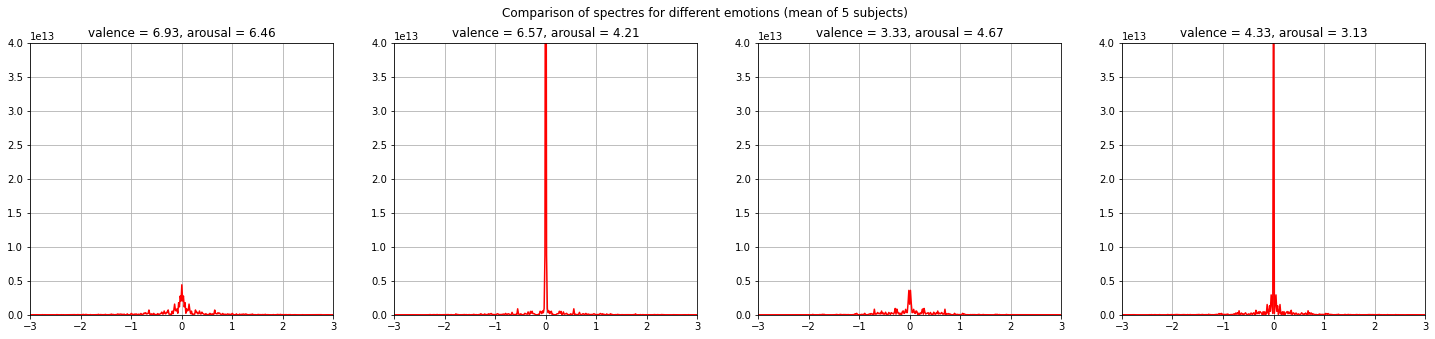

In [6]:
plt.figure(figsize=(25, 5))
plt.suptitle('Comparison of spectres for different emotions (mean of 5 subjects)')

plt.subplot(1, 4, 1)
plt.title('valence = 6.93, arousal = 6.46')
plt.plot(freqs_3[idx_3], ps_3[idx_3], c='r')
plt.xlim([-3, 3])
plt.ylim([0, 4e13])
plt.grid('on')

plt.subplot(1, 4, 2)
plt.title('valence = 6.57, arousal = 4.21')
plt.plot(freqs_13[idx_13], ps_13[idx_13], c='r')
plt.xlim([-3, 3])
plt.ylim([0, 4e13])
plt.grid('on')

plt.subplot(1, 4, 3)
plt.title('valence = 3.33, arousal = 4.67')
plt.plot(freqs_23[idx_23], ps_23[idx_23], c='r')
plt.xlim([-3, 3])
plt.ylim([0, 4e13])
plt.grid('on')

plt.subplot(1, 4, 4)
plt.title('valence = 4.33, arousal = 3.13')
plt.plot(freqs_27[idx_27], ps_27[idx_27], c='r')
plt.xlim([-3, 3])
plt.ylim([0, 4e13])
plt.grid('on')

plt.show()

* Feature 1 - max amplitude
* Feature 2 - mean in (0.2, 0.5)

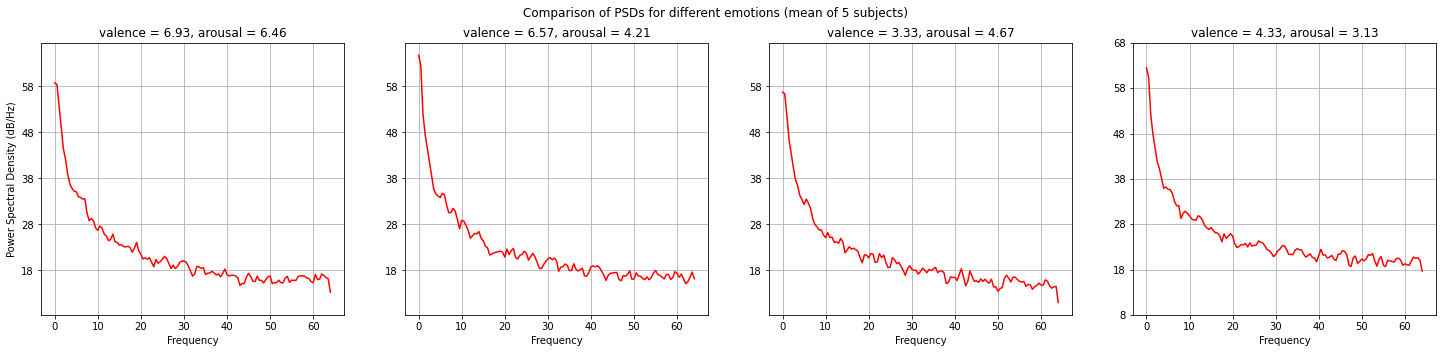

In [7]:
fig = plt.figure(figsize=(25, 5))
plt.suptitle('Comparison of PSDs for different emotions (mean of 5 subjects)')

ax1 = fig.add_subplot(1, 4, 1)
plt.title('valence = 6.93, arousal = 6.46')
plt.psd(np.mean(resp_3, axis=0), Fs=128, c='r')

plt.subplot(1, 4, 2, sharey=ax1)
plt.title('valence = 6.57, arousal = 4.21')
plt.psd(np.mean(resp_13, axis=0), Fs=128, c='r')
plt.ylabel('')

plt.subplot(1, 4, 3, sharey=ax1)
plt.title('valence = 3.33, arousal = 4.67')
plt.psd(np.mean(resp_23, axis=0), Fs=128, c='r')
plt.ylabel('')

plt.subplot(1, 4, 4, sharey=ax1)
plt.title('valence = 4.33, arousal = 3.13')
plt.psd(np.mean(resp_27, axis=0), Fs=128, c='r')
plt.ylabel('')

plt.show()

* Feature 3 - max PSD
* Feature 4 - mean PSD in (40, 60) Hz

## Time domain

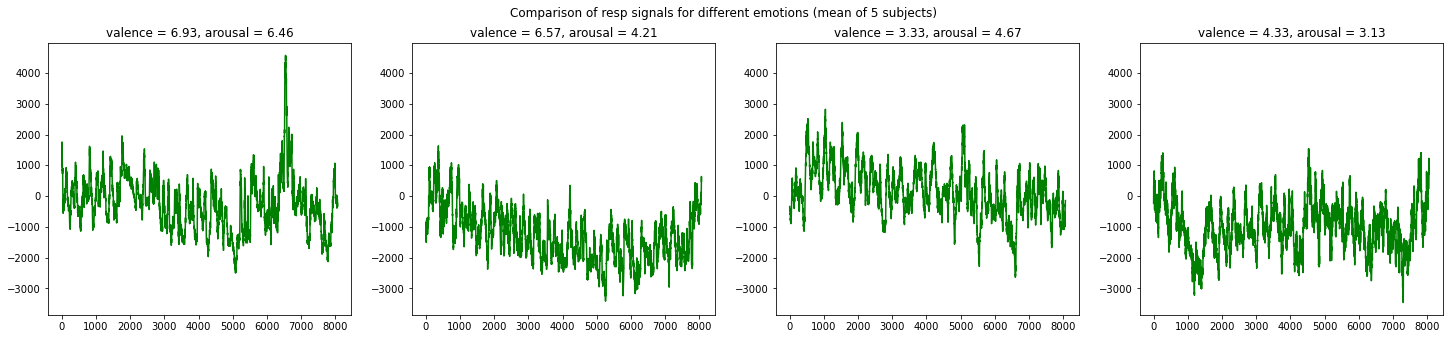

In [8]:
fig = plt.figure(figsize=(25, 5))
plt.suptitle('Comparison of resp signals for different emotions (mean of 5 subjects)')

ax1 = fig.add_subplot(1, 4, 1)
plt.title('valence = 6.93, arousal = 6.46')
plt.plot(np.mean(resp_3, axis=0), c='g')

plt.subplot(1, 4, 2, sharey=ax1)
plt.title('valence = 6.57, arousal = 4.21')
plt.plot(np.mean(resp_13, axis=0), c='g')
plt.ylabel('')

plt.subplot(1, 4, 3, sharey=ax1)
plt.title('valence = 3.33, arousal = 4.67')
plt.plot(np.mean(resp_23, axis=0), c='g')
plt.ylabel('')

plt.subplot(1, 4, 4, sharey=ax1)
plt.title('valence = 4.33, arousal = 3.13')
plt.plot(np.mean(resp_27, axis=0), c='g')
plt.ylabel('')

plt.show()

## Breathing rate variability

In [9]:
from scipy import signal

fs = 128
fn = 0.5*fs

b, a = signal.butter(2, 0.5/fn, btype='low')
filtered_3 = signal.lfilter(b, a, resp_3[0])
filtered_27 = signal.lfilter(b, a, resp_27[0])

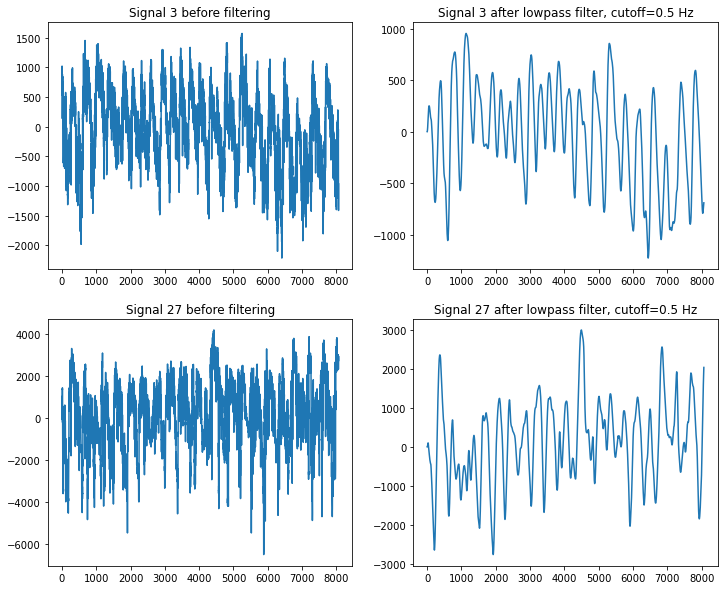

In [12]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(resp_3[0])
plt.title('Signal 3 before filtering')

plt.subplot(2, 2, 2)
plt.plot(filtered_3)
plt.title('Signal 3 after lowpass filter, cutoff=0.5 Hz')

plt.subplot(2, 2, 3)
plt.plot(resp_27[0])
plt.title('Signal 27 before filtering')

plt.subplot(2, 2, 4)
plt.plot(filtered_27)
plt.title('Signal 27 after lowpass filter, cutoff=0.5 Hz')

plt.show()

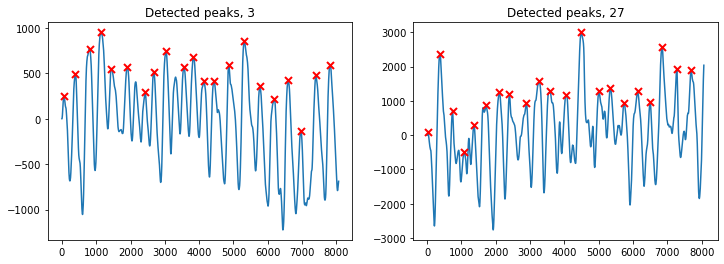

In [14]:
peaks_3, _ = signal.find_peaks(filtered_3, distance=250)
peaks_27, _ = signal.find_peaks(filtered_27, distance=250)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(filtered_3)
plt.plot(peaks_3, filtered_3[peaks_3], 'rx', markersize=7, mew=2)
plt.title('Detected peaks, 3')

plt.subplot(1, 2, 2)
plt.plot(filtered_27)
plt.plot(peaks_27, filtered_27[peaks_27], 'rx', markersize=7, mew=2)
plt.title('Detected peaks, 27')

plt.show()

In [15]:
def get_intervals(peaks):
    intervals = np.zeros(len(peaks)-1)
    j = 0
    for i in range(len(peaks)-1):
        intervals[j] = peaks[i+1]-peaks[i]
        j += 1

    return intervals

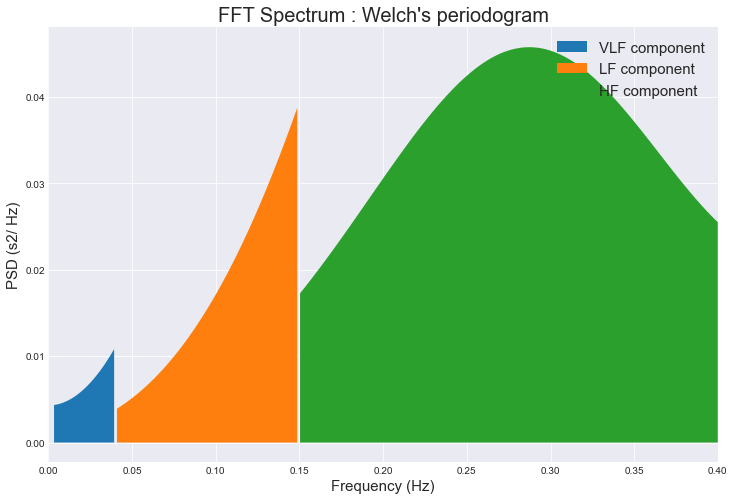

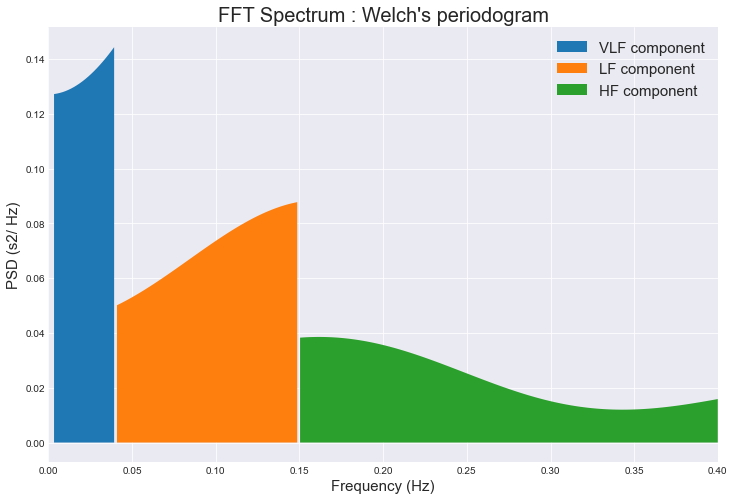

In [18]:
from hrvanalysis import plot_psd

intervals_3 = get_intervals(peaks_3)
plot_psd(intervals_3, method="welch")

intervals_27 = get_intervals(peaks_27)
plot_psd(intervals_27, method="welch")

Comparison of BRV spectra for videos 3 and 27